### In this notebook one fit logistic regression built on Pytorch on the raw event stream and on HOTS outputs

In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%cd '../HOTS'

/home/antoine/homhots/HOTS/HOTS


In [2]:
from Tools import tic,toc, get_loader, fit_data, predict_data, classification_results
record_path = '../Records/EXP_03_NMNIST/models/'

# Network parameters

In [3]:
sigma = None
pooling = False
homeinv = False
jitonic = [None,None] #[temporal, spatial]
jitter = False
tau = 5
nblay = 3
nbclust = 4
filt = 2
timestr = '2021-02-16'

In [4]:
nb_test = 10000
nb_train = 60000
ds = 1200
ds = 120
ds = 12
nb_test = nb_test//ds
nb_train = nb_train//ds
print(f'training set size: {nb_train} - testing set: {nb_test}')

training set size: 5000 - testing set: 833


# LR Parameters

In [5]:
learning_rate = 0.005
beta1, beta2 = 0.9, 0.999
betas = (beta1, beta2)
num_epochs = 2 ** 5 + 1
#num_epochs = 2 ** 9 + 1
num_epochs

33

# Loading raw input as a dataset

In [6]:
name = 'raw'
learn_set, nb_pola, name_net = get_loader(name, record_path, nb_train, True, filt, tau, nblay, nbclust, sigma, homeinv, jitter, timestr)

# Fitting LR on the raw inputs

In [7]:
tic()
model, loss = fit_data(name_net, learn_set, nb_train,nb_pola,learning_rate,num_epochs,betas,verbose=True)
toc()

device -> cuda
Iteration: 0 - Loss: 0.27625
Iteration: 1 - Loss: 0.25994
Iteration: 2 - Loss: 0.23130
Iteration: 3 - Loss: 0.22527
Iteration: 4 - Loss: 0.24030
Iteration: 5 - Loss: 0.22370
Iteration: 6 - Loss: 0.24251
Iteration: 7 - Loss: 0.23416
Iteration: 8 - Loss: 0.23463
Iteration: 9 - Loss: 0.23644
Iteration: 10 - Loss: 0.23632
Iteration: 11 - Loss: 0.21746
Iteration: 12 - Loss: 0.23381
Iteration: 13 - Loss: 0.23416
Iteration: 14 - Loss: 0.22106
Iteration: 15 - Loss: 0.23179
Iteration: 16 - Loss: 0.23423
Iteration: 17 - Loss: 0.23369
Iteration: 18 - Loss: 0.21920
Iteration: 19 - Loss: 0.23326
Iteration: 20 - Loss: 0.23351
Iteration: 21 - Loss: 0.22932
Iteration: 22 - Loss: 0.23253
Iteration: 23 - Loss: 0.24025
Iteration: 24 - Loss: 0.22328
Iteration: 25 - Loss: 0.22616
Iteration: 26 - Loss: 0.22939
Iteration: 27 - Loss: 0.22998
Iteration: 28 - Loss: 0.21787
Iteration: 29 - Loss: 0.22694
Iteration: 30 - Loss: 0.22856
Iteration: 31 - Loss: 0.22145
Iteration: 32 - Loss: 0.21887
Done 

# Testing on the raw inputs


In [8]:
test_set, nb_pola, name_net = get_loader(name, record_path, nb_test, False, filt, tau, nblay, nbclust, sigma, homeinv, jitter, timestr)

In [9]:
pred_target, true_target = predict_data(test_set, model, nb_test)

np.mean(accuracy)=0.782


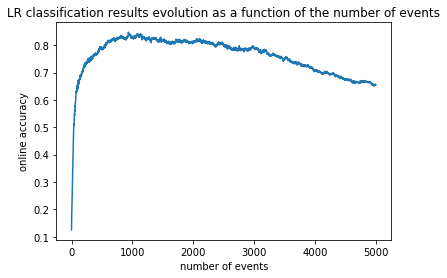

In [10]:
mean_acc, online_acc = classification_results(pred_target, true_target, nb_test, verbose= True)

# LR on the output of HOTS

In [11]:
name = 'homhots'
learn_set, nb_pola, name_net = get_loader(name, record_path, nb_train, True, filt, tau, nblay, nbclust, sigma, homeinv, jitter, timestr)

tic()
model, loss = fit_data(name_net, learn_set, nb_train, nb_pola, learning_rate, num_epochs, betas, verbose=True)
toc()

2021-02-16_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False
../Records/EXP_03_NMNIST/train/2021-02-16_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False_5000_[None, None]_LR.pkl
no jitter


100%|██████████| 5000/5000 [3:35:47<00:00,  2.59s/it]


loading existing model


TypeError: cannot unpack non-iterable LogisticRegressionCV object

In [12]:
test_set, nb_pola, name_net = get_loader(name, record_path, nb_test, False, filt, tau, nblay, nbclust, sigma, homeinv, jitter, timestr)
pred_target, true_target = predict_data(test_set, model, nb_test)
mean_acc, online_acc = classification_results(pred_target, true_target, nb_test, verbose=True)

2021-02-16_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False
../Records/EXP_03_NMNIST/test/2021-02-16_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[5000.0, 50000.0, 500000.0]_[2, 4, 8]_False_833_[None, None]_LR.pkl
no jitter


100%|██████████| 833/833 [35:28<00:00,  2.56s/it]


RuntimeError: mat1 dim 1 must match mat2 dim 0